In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import statsmodels.api as sm  

plt.style.use('seaborn-darkgrid')

In [2]:
import pandas as pd

eur_usd = pd.read_csv("./EUR_USD_Hdata.csv")
eur_usdt = pd.read_csv("./EUR_USD_Tdata.csv")
# print(eur_usd)

# Trainnig Data

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


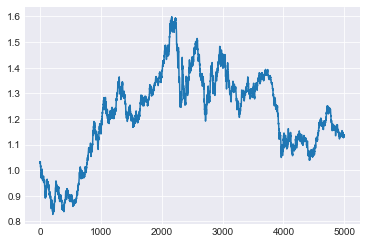

In [3]:
X=eur_usd.as_matrix(columns=['Price'])
price=np.reshape(X,5000)

plt.plot(price)


# Test Data

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


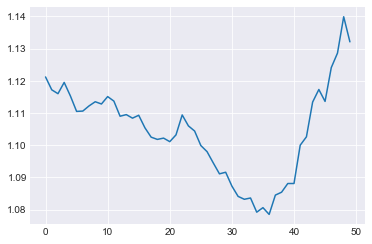

In [4]:
X=eur_usdt.as_matrix(columns=['Price'])
price=np.reshape(X,50)

plt.plot(price)


# Applying Augmented Dickey fuller test to EUR_USD data

In [5]:
from statsmodels.tsa.stattools import adfuller
X = eur_usd['Price'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.741465
p-value: 0.409885
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


the time series is not stationary hence we will aplly arima 

# KPSS

In [6]:
from statsmodels.tsa.stattools import kpss
print ('Results of KPSS Test:')
kpsstest = kpss(X,nlags=5, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic           22.862243
p-value                   0.010000
Lags Used                 5.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [7]:
def differencing(series):
    dif=np.zeros(5000)
    for i in range(1,len(series)):
        dif[i]=series[i]-series[i-1]
    return dif

# Plotting Auto correlation fuction of the time series

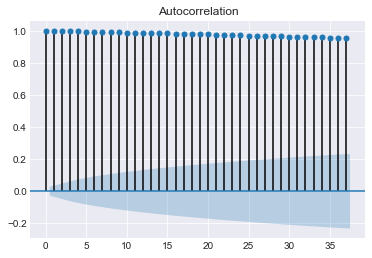

In [8]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(eur_usd['Price'])
pyplot.show()

# Plotting partial auto correlation fuction of the time series

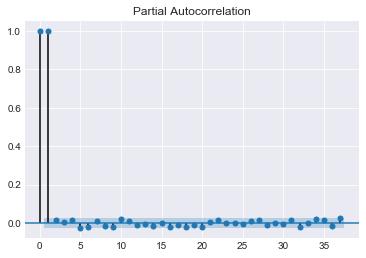

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(eur_usd['Price'])
pyplot.show()

# Plotting Auto correlation fuction of the time series 1st diff

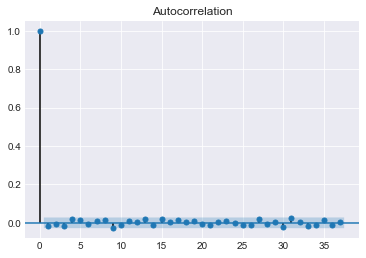

In [10]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

newx=differencing(eur_usd['Price'])
plot_acf(newx)
pyplot.show()

# Plotting partial auto correlation fuction of the time series first difference 

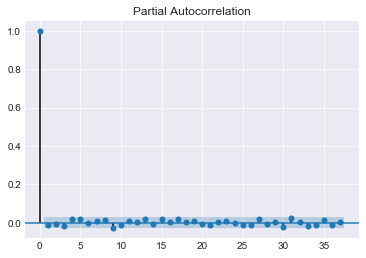

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(newx)
pyplot.show()

# plotting auto correlation function 2nd order differencing 

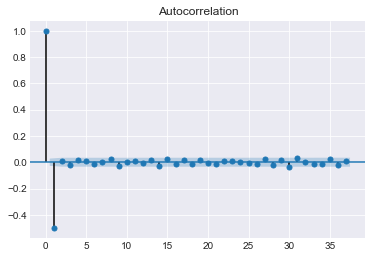

In [12]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

new2=differencing(newx)
plot_acf(new2)
pyplot.show()

# plotting 2nd order partial differencing 

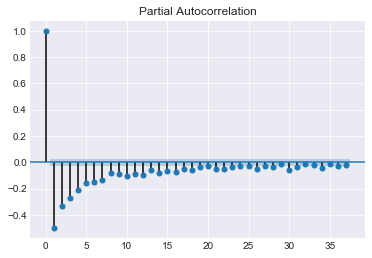

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new2)
pyplot.show()

In [14]:
new3= differencing(new2)

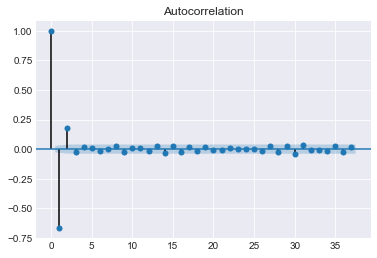

In [15]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

new2=differencing(newx)
plot_acf(new3)
pyplot.show()

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


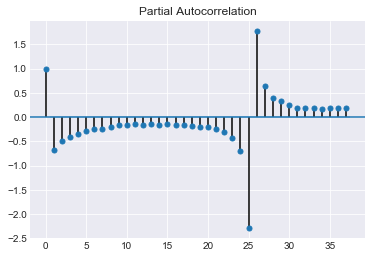

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new3)
pyplot.show()

### These plots show that an ARIMA(2) model (auto regressive model with 2 lags) is appropriate for this series

In [17]:

# endo=pd.concat([eur_usd,eur_usdt])

endo=eur_usd["Price"]

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
for d in range(3):
    for p in range(5):
        model = ARIMA(endo, order=(p,d,p))
        result = model.fit(disp=0)
        print("d= ",d,"p= ",p,"AIC= ",result.aic,"BIC= ",result.bic,"HQIC= ",result.hqic)

d=  0 p=  0 AIC=  -3591.0258438278706 BIC=  -3577.991457445038 HQIC=  -3586.4574964321205
d=  0 p=  1 AIC=  -34670.43618144297 BIC=  -34644.36740867731 HQIC=  -34661.29948665147
d=  0 p=  2 AIC=  -34666.82301716391 BIC=  -34627.71985801541 HQIC=  -34653.11797497666
d=  0 p=  3 AIC=  -34668.05822316201 BIC=  -34615.920677630675 HQIC=  -34649.784833579004


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


d=  0 p=  4 AIC=  -34670.571345160744 BIC=  -34605.39941324658 HQIC=  -34647.729608181995
d=  1 p=  0 AIC=  -34669.86053224657 BIC=  -34656.826545903736 HQIC=  -34665.29227878897
d=  1 p=  1 AIC=  -34667.214062147934 BIC=  -34641.14608946228 HQIC=  -34658.07755523274


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


d=  1 p=  2 AIC=  -34663.22481668226 BIC=  -34624.122857653776 HQIC=  -34649.52005630947
d=  1 p=  3 AIC=  -34666.04541142075 BIC=  -34613.909466049445 HQIC=  -34647.77239759037


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


d=  1 p=  4 AIC=  -34679.45393595729 BIC=  -34614.28400424315 HQIC=  -34656.61266866931
d=  2 p=  0 AIC=  -31127.89459885828 BIC=  -31114.861012635487 HQIC=  -31123.326439359837


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


d=  2 p=  1 AIC=  -34651.030479407884 BIC=  -34624.9633069623 HQIC=  -34641.894160411


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


d=  2 p=  2 AIC=  -34647.23372436034 BIC=  -34608.13296569197 HQIC=  -34633.529245865015


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


d=  2 p=  3 AIC=  -34640.24253046322 BIC=  -34588.10818557206 HQIC=  -34621.96989246945
d=  2 p=  4 AIC=  -34629.374691952034 BIC=  -34564.20676083808 HQIC=  -34606.533894459826


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [20]:
eur_usdt['ar']=forecast
history=eur_usd["Price"].to_numpy()
for i in range(0,2):
    model = ARIMA(history, order=(2,1,2))
    result = model.fit(disp=0)
    forecast = result.forecast()[0]
    eur_usdt['ar'].iloc[i]=forecast
    print( eur_usdt["Price"].iloc[i]," ",eur_usdt['ar'].iloc[i]," ",forecast[0])
    np.append(history, eur_usdt["Price"].iloc[i])


NameError: name 'forecast' is not defined

In [ ]:
eur_usdt

In [ ]:
ax = plt.gca()

eur_usdt.plot(kind='line',y='ar',x='days',color='blue',ax=ax)
eur_usdt.plot(kind='line',y='Price',x='days', color='red', ax=ax)

plt.show()

In [ ]:
residuals = pd.DataFrame(result.resid)
residuals.plot()
pyplot.show()


In [ ]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags=[2],model_df=3, return_df=True)